<a href="https://colab.research.google.com/github/daksh212004/Automated-Car-Dent-and-Prediction-system/blob/main/IPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAINING**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from google.colab import drive
drive.mount('/content/drive')

train_img_path = '/content/drive/MyDrive/training'
test_img_path = '/content/drive/MyDrive/validation'


# Hyperparameters
batch_size = 32
img_height = 224
img_width = 224
num_classes = 3

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)


train_ds = train_data_gen.flow_from_directory(
    train_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=123,
    shuffle=True
)

valid_ds = train_data_gen.flow_from_directory(
    train_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=123,
    shuffle=True
)


test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)
test_ds = test_data_gen.flow_from_directory(
    test_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# EfficientNetB7
base_model = tf.keras.applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model initially


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')


history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=50,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)


model.load_weights('best_model.h5')


base_model.trainable = True
for layer in base_model.layers[:600]:
    layer.trainable = False


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


fine_tune_history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10,
    callbacks=[early_stopping, lr_scheduler]
)


test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Final Test Accuracy: {test_accuracy:.2f}")


Mounted at /content/drive
Found 1108 images belonging to 3 classes.
Found 275 images belonging to 3 classes.
Found 248 images belonging to 3 classes.
258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2852 - loss: 5.7404

35/35 ━━━━━━━━━━━━━━━━━━━━ 522s 13s/step - accuracy: 0.2856 - loss: 5.7370 - val_accuracy: 0.3345 - val_loss: 5.3520 - learning_rate: 1.0000e-04
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 695ms/step - accuracy: 0.3109 - loss: 5.3176 - val_accuracy: 0.3345 - val_loss: 4.9659 - learning_rate: 1.0000e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 667ms/step - accuracy: 0.3295 - loss: 4.9016 - val_accuracy: 0.3345 - val_loss: 4.6203 - learning_rate: 1.0000e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 42s 689ms/step - accuracy: 0.3256 - loss: 4.5682 - val_accuracy: 0.3345 - val_loss: 4.3130 - learning_rate: 1.0000e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 686ms/step - accuracy: 0.3223 - loss: 4.2639 - val_accuracy: 0.3345 - val_loss: 4.0325 - learning_rate: 1.0000e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 694ms/step - accuracy: 0.3422 - loss: 3.9802 - val_accuracy: 0.3345 - val_loss: 3.7830 - learning_rate: 1.0000e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.3452

35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 728ms/step - accuracy: 0.3450 - loss: 3.7463 - val_accuracy: 0.3382 - val_loss: 3.5529 - learning_rate: 1.0000e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 692ms/step - accuracy: 0.3383 - loss: 3.5063 - val_accuracy: 0.3345 - val_loss: 3.3496 - learning_rate: 1.0000e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 669ms/step - accuracy: 0.3356 - loss: 3.3151 - val_accuracy: 0.3345 - val_loss: 3.1654 - learning_rate: 1.0000e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.3269 - loss: 3.1475

35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 729ms/step - accuracy: 0.3269 - loss: 3.1463 - val_accuracy: 0.3418 - val_loss: 3.0003 - learning_rate: 1.0000e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.3129 - loss: 2.9869

35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 730ms/step - accuracy: 0.3128 - loss: 2.9858 - val_accuracy: 0.3564 - val_loss: 2.8505 - learning_rate: 1.0000e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 687ms/step - accuracy: 0.3344 - loss: 2.8258 - val_accuracy: 0.3345 - val_loss: 2.7150 - learning_rate: 1.0000e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 692ms/step - accuracy: 0.3252 - loss: 2.6906 - val_accuracy: 0.3345 - val_loss: 2.5915 - learning_rate: 1.0000e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 677ms/step - accuracy: 0.3378 - loss: 2.5718 - val_accuracy: 0.3345 - val_loss: 2.4788 - learning_rate: 1.0000e-04
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.3299 - loss: 2.4625

35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 695ms/step - accuracy: 0.3301 - loss: 2.4617 - val_accuracy: 0.3600 - val_loss: 2.3763 - learning_rate: 1.0000e-04
Epoch 16/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 46s 843ms/step - accuracy: 0.3583 - loss: 2.3464 - val_accuracy: 0.3345 - val_loss: 2.2847 - learning_rate: 1.0000e-04
Epoch 17/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 693ms/step - accuracy: 0.3439 - loss: 2.2693 - val_accuracy: 0.3455 - val_loss: 2.1995 - learning_rate: 1.0000e-04
Epoch 18/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 685ms/step - accuracy: 0.3515 - loss: 2.1802 - val_accuracy: 0.3345 - val_loss: 2.1226 - learning_rate: 1.0000e-04
Epoch 19/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 691ms/step - accuracy: 0.3298 - loss: 2.1086 - val_accuracy: 0.3382 - val_loss: 2.0536 - learning_rate: 1.0000e-04
Epoch 20/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 704ms/step - accuracy: 0.3248 - loss: 2.0405 - val_accuracy: 0.3309 - val_loss: 1.9889 - learning_rate: 1.0000e-04
Epoch 21/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 657ms/step - accuracy

35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 725ms/step - accuracy: 0.3413 - loss: 1.2667 - val_accuracy: 0.3891 - val_loss: 1.2576 - learning_rate: 1.0000e-04
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 223s 3s/step - accuracy: 0.3356 - loss: 1.2616 - val_accuracy: 0.3309 - val_loss: 1.2568 - learning_rate: 1.0000e-05
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 755ms/step - accuracy: 0.3306 - loss: 1.2631 - val_accuracy: 0.3309 - val_loss: 1.2559 - learning_rate: 1.0000e-05
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 760ms/step - accuracy: 0.3564 - loss: 1.2546 - val_accuracy: 0.3273 - val_loss: 1.2548 - learning_rate: 1.0000e-05
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 737ms/step - accuracy: 0.3159 - loss: 1.2547 - val_accuracy: 0.3273 - val_loss: 1.2545 - learning_rate: 1.0000e-05
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 750ms/step - accuracy: 0.3441 - loss: 1.2523 - val_accuracy: 0.3273 - val_loss: 1.2535 - learning_rate: 1.0000e-05
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 747ms/step - accuracy: 0.3436

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

# **EFFICIENTNETB7**

Mounted at /content/drive
Found 1108 images belonging to 3 classes.
Found 275 images belonging to 3 classes.
Found 248 images belonging to 3 classes.
258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 778s 17s/step - accuracy: 0.3668 - loss: 5.7265 - val_accuracy: 0.3273 - val_loss: 5.3441 - learning_rate: 1.0000e-04
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 656ms/step - accuracy: 0.3206 - loss: 5.2959 - val_accuracy: 0.3273 - val_loss: 4.9591 - learning_rate: 1.0000e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 742ms/step - accuracy: 0.3284 - loss: 4.9040 - val_accuracy: 0.3345 - val_loss: 4.6130 - learning_rate: 1.0000e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 655ms/step - accuracy: 0.3097 - loss: 4.5724 - val_accuracy: 0.3345 - val_loss: 4.3007 - learning_rate: 1.0000e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 643ms/step - accuracy: 0.3601 - loss: 4.2400 - val_accuracy: 0.3273 - val_loss: 4.0162 - learning_rate: 1.0000e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 650ms/step - accuracy: 0.3555 - loss: 3.9613 - val_accuracy: 0.3273 - val_loss: 3.7653 - learning_rate: 1.0000e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 675ms/step - accuracy: 0.327

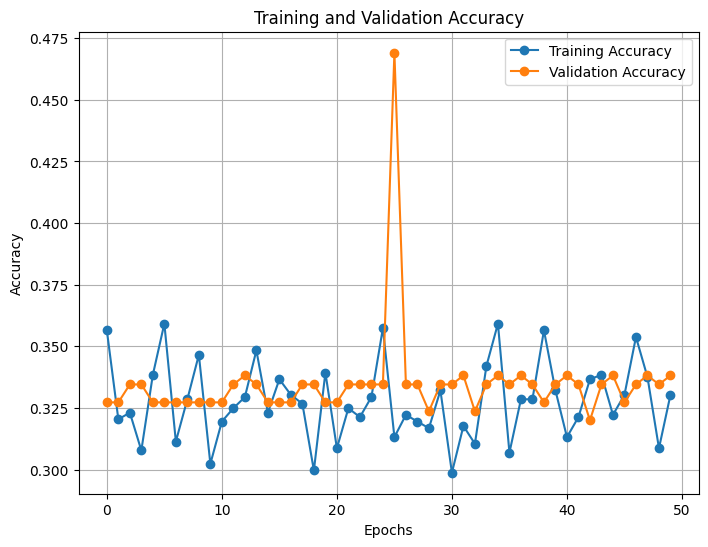

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File paths
train_img_path = '/content/drive/MyDrive/training'
test_img_path = '/content/drive/MyDrive/validation'

# Hyperparameters
batch_size = 32
img_height = 224
img_width = 224
num_classes = 3  # Number of car damage severity classes

# Data Augmentation for Training
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    validation_split=0.2  # Splitting for validation
)

# Creating train and validation datasets
train_ds = train_data_gen.flow_from_directory(
    train_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=123,
    shuffle=True
)

valid_ds = train_data_gen.flow_from_directory(
    train_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=123,
    shuffle=True
)

# Test dataset generator
test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)
test_ds = test_data_gen.flow_from_directory(
    test_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Model Definition - Using EfficientNetB7
base_model = tf.keras.applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model initially

# Adding custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the model
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=50,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# Load best model weights
model.load_weights('best_model.keras')

# Plot training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

plot_accuracy(history)


# **DENSENET-121**

Found 248 images belonging to 3 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6999 - loss: 6.0178
Test Loss: 6.0852
Test Accuracy: 0.6492
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Test Classification Report
              precision    recall  f1-score   support

    01-minor       0.66      0.88      0.75        82
 02-moderate       0.47      0.25      0.33        75
   03-severe       0.71      0.77      0.74        91

    accuracy                           0.65       248
   macro avg       0.61      0.63      0.61       248
weighted avg       0.62      0.65      0.62       248



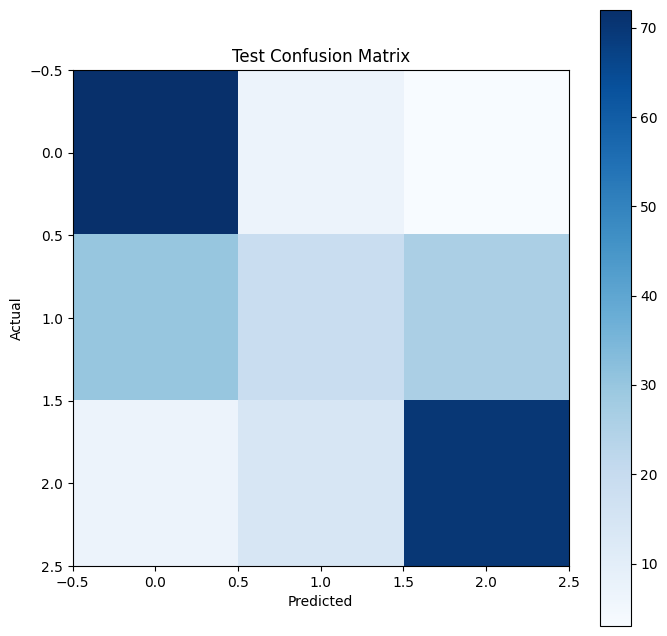

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import classification_report, confusion_matrix


test_dir = '/content/drive/MyDrive/validation'
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

test_generator.reset()
test_predictions = model.predict(test_generator)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = test_generator.classes
test_class_labels = list(test_generator.class_indices.keys())


print("Test Classification Report")
print(classification_report(test_true_classes, test_predicted_classes, target_names=test_class_labels))

test_conf_matrix = confusion_matrix(test_true_classes, test_predicted_classes)
plt.figure(figsize=(8, 8))
plt.imshow(test_conf_matrix, cmap='Blues')
plt.title("Test Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **VALIDATION**

In [ ]:
severity_labels = {0: "Minor", 1: "Moderate", 2: "Severe"}

def show_images_with_severity(generator, title):
    batch_images, batch_labels = next(generator)
    plt.figure(figsize=(8, 4))
    for i in range(2):
        plt.subplot(1, 2, i + 1)
        plt.imshow(batch_images[i])
        severity_level = severity_labels[np.argmax(batch_labels[i])]
        plt.title(f"{title} - Severity: {severity_level}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


show_images_with_severity(val_generator, "Validation Set")
show_images_with_severity(test_generator, "Test Set")


NameError: name 'val_generator' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


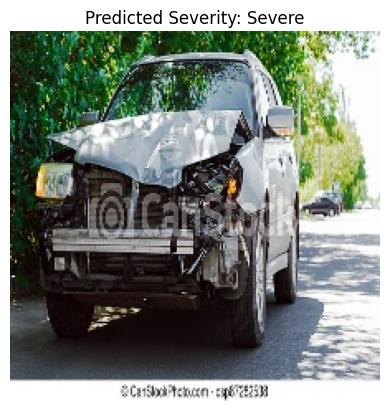

Prediction: [[0.03924928 0.2097348  0.7510159 ]]
Predicted Class: 2
Severity Level: Severe


In [ ]:
# prompt: severity_labels = {0: "Minor", 1: "Moderate", 2: "Severe"}
# def show_images_with_severity(generator, title):
#     batch_images, batch_labels = next(generator)
#     plt.figure(figsize=(8, 4))
#     for i in range(2):
#         plt.subplot(1, 2, i + 1)
#         plt.imshow(batch_images[i])
#         severity_level = severity_labels[np.argmax(batch_labels[i])]
#         plt.title(f"{title} - Severity: {severity_level}")
#         plt.axis('off')
#     plt.suptitle(title)
#     plt.show()
# show_images_with_severity(val_generator, "Validation Set")
# show_images_with_severity(test_generator, "Test Set")
# give me a code where you input an image

import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image_severity(image_path, model, severity_labels):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Preprocess the image

    prediction = model.predict(x)
    predicted_class = np.argmax(prediction[0])
    severity_level = severity_labels[predicted_class]

    plt.imshow(img)
    plt.title(f"Predicted Severity: {severity_level}")
    plt.axis('off')
    plt.show()

    print(f"Prediction: {prediction}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Severity Level: {severity_level}")


# Example usage (assuming 'model' is your loaded model):
image_path_to_predict = '/content/43.jpg'  # Replace with the path to your image
predict_image_severity(image_path_to_predict, model, severity_labels)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers.schedules import CosineDecay

from google.colab import drive
drive.mount('/content/drive')

train_img_path = '/content/drive/MyDrive/training'
test_img_path = '/content/drive/MyDrive/validation'

# Hyperparameters
batch_size = 32
img_height = 224
img_width = 224
num_classes = 3
initial_epochs = 50
fine_tune_epochs = 20

# Enhanced Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=45,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2
)

train_ds = train_data_gen.flow_from_directory(
    train_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=123,
    shuffle=True
)

valid_ds = train_data_gen.flow_from_directory(
    train_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=123,
    shuffle=True
)

test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)
test_ds = test_data_gen.flow_from_directory(
    test_img_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model initially

# Build Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Compile Model
initial_learning_rate = 0.0001
lr_schedule = CosineDecay(initial_learning_rate, decay_steps=initial_epochs * len(train_ds))
model.compile(
    optimizer=optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_densenet_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# Initial Training
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=initial_epochs,
    callbacks=[early_stopping, model_checkpoint]
)

# Load Best Weights
model.load_weights('best_densenet_model.h5')

# Fine-Tuning
base_model.trainable = True
# Freeze earlier layers (e.g., first 300 layers)
for layer in base_model.layers[:300]:
    layer.trainable = False

# Recompile Model with Lower Learning Rate
fine_tune_lr = CosineDecay(1e-5, decay_steps=fine_tune_epochs * len(train_ds))
model.compile(
    optimizer=optimizers.Adam(learning_rate=fine_tune_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-Tune Model
fine_tune_history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=fine_tune_epochs,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1108 images belonging to 3 classes.
Found 275 images belonging to 3 classes.
Found 248 images belonging to 3 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.3273 - loss: 10.6693

35/35 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.3277 - loss: 10.6645 - val_accuracy: 0.3855 - val_loss: 9.6539
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.4007 - loss: 10.0264

35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 710ms/step - accuracy: 0.4007 - loss: 10.0233 - val_accuracy: 0.4145 - val_loss: 9.2171
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4335 - loss: 9.5397

35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 700ms/step - accuracy: 0.4338 - loss: 9.5370 - val_accuracy: 0.5491 - val_loss: 8.7912
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.4206 - loss: 9.2710

35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 694ms/step - accuracy: 0.4207 - loss: 9.2684 - val_accuracy: 0.5709 - val_loss: 8.4885
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.4865 - loss: 8.8376

35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 670ms/step - accuracy: 0.4863 - loss: 8.8366 - val_accuracy: 0.5891 - val_loss: 8.2151
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 688ms/step - accuracy: 0.4964 - loss: 8.5374 - val_accuracy: 0.5709 - val_loss: 7.9653
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.5076 - loss: 8.3035

35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 702ms/step - accuracy: 0.5073 - loss: 8.3034 - val_accuracy: 0.6218 - val_loss: 7.7603
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 687ms/step - accuracy: 0.5227 - loss: 8.1018 - val_accuracy: 0.5964 - val_loss: 7.5630
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 827ms/step - accuracy: 0.5228 - loss: 7.9153 - val_accuracy: 0.5891 - val_loss: 7.4467
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.5276 - loss: 7.7582

35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 708ms/step - accuracy: 0.5275 - loss: 7.7565 - val_accuracy: 0.6327 - val_loss: 7.2486
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 700ms/step - accuracy: 0.5196 - loss: 7.6143 - val_accuracy: 0.6255 - val_loss: 7.1238
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 665ms/step - accuracy: 0.5387 - loss: 7.4333 - val_accuracy: 0.6291 - val_loss: 6.9429
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 42s 685ms/step - accuracy: 0.5401 - loss: 7.3203 - val_accuracy: 0.6218 - val_loss: 6.8936
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5167 - loss: 7.2704

35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 679ms/step - accuracy: 0.5170 - loss: 7.2684 - val_accuracy: 0.6473 - val_loss: 6.7629
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 654ms/step - accuracy: 0.5724 - loss: 7.0471 - val_accuracy: 0.6400 - val_loss: 6.6618
Epoch 16/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 686ms/step - accuracy: 0.5125 - loss: 7.0266 - val_accuracy: 0.6291 - val_loss: 6.5903
Epoch 17/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 688ms/step - accuracy: 0.5594 - loss: 6.8621 - val_accuracy: 0.6473 - val_loss: 6.5218
Epoch 18/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 686ms/step - accuracy: 0.5372 - loss: 6.8204 - val_accuracy: 0.5891 - val_loss: 6.5109
Epoch 19/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 649ms/step - accuracy: 0.5547 - loss: 6.7843 - val_accuracy: 0.6291 - val_loss: 6.3927
Epoch 20/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 688ms/step - accuracy: 0.5637 - loss: 6.6600 - val_accuracy: 0.6327 - val_loss: 6.3191
Epoch 21/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.5476 - loss: 6.6237

35/35 ━━━━━━━━━━━━━━━━━━━━ 25s 719ms/step - accuracy: 0.5474 - loss: 6.6244 - val_accuracy: 0.6509 - val_loss: 6.2358
Epoch 22/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 684ms/step - accuracy: 0.5472 - loss: 6.5925 - val_accuracy: 0.6255 - val_loss: 6.2516
Epoch 23/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5469 - loss: 6.5152

35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 738ms/step - accuracy: 0.5471 - loss: 6.5149 - val_accuracy: 0.6836 - val_loss: 6.1596
Epoch 24/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 683ms/step - accuracy: 0.5662 - loss: 6.4137 - val_accuracy: 0.6473 - val_loss: 6.1594
Epoch 25/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 663ms/step - accuracy: 0.5409 - loss: 6.4709 - val_accuracy: 0.6400 - val_loss: 6.0846
Epoch 26/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 689ms/step - accuracy: 0.5397 - loss: 6.4177 - val_accuracy: 0.6545 - val_loss: 6.0680
Epoch 27/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 681ms/step - accuracy: 0.5563 - loss: 6.3447 - val_accuracy: 0.6436 - val_loss: 6.0289
Epoch 28/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 679ms/step - accuracy: 0.5929 - loss: 6.2653 - val_accuracy: 0.6436 - val_loss: 6.0643
Epoch 29/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 661ms/step - accuracy: 0.5330 - loss: 6.3476 - val_accuracy: 0.6582 - val_loss: 5.9936
Epoch 30/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 676ms/step - accuracy: 0.5391 - loss: 6.3064 - val_accuracy